<a href="https://colab.research.google.com/github/zanuarts/ComputerVision/blob/master/CV_FaceDetection_HOGvsMTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HOG

In [1]:
pip install face-recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=92c5636a65ec3b01086ecc9d42e173f3fd895a62a26281bb291a08f1e0f03578
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


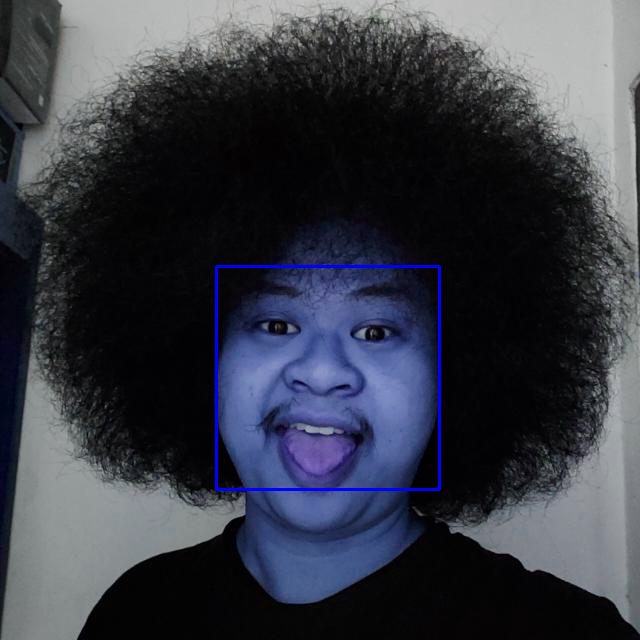

In [14]:
import face_recognition
from google.colab.patches import cv2_imshow
import cv2

image = face_recognition.load_image_file("/content/pp.jpg")

face_locations = face_recognition.face_locations(image, model="hog")
face_landmarks = face_recognition.face_landmarks(image)

for (top, right, bottom, left), landmarks in zip (face_locations, face_landmarks):
  cv2.rectangle(image, (left, bottom), (right, top), (255,0,0),2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## MTCNN

In [15]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 7.4MB/s 


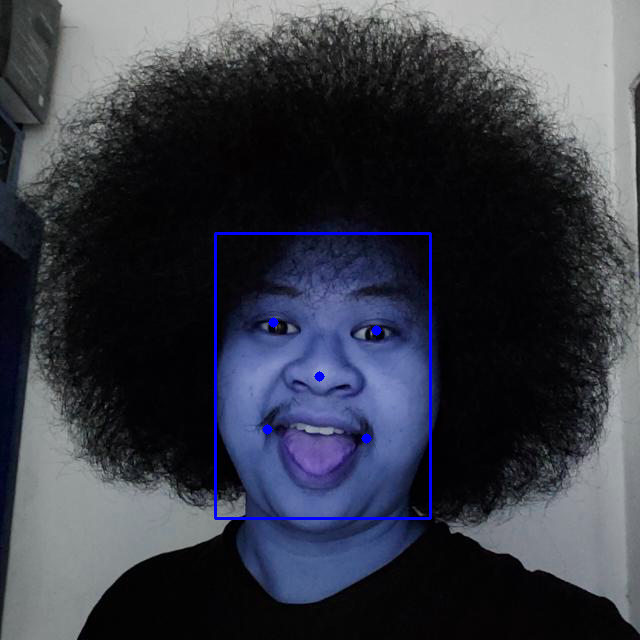

In [26]:
from mtcnn.mtcnn import MTCNN
from google.colab.patches import cv2_imshow
import face_recognition
import cv2

detector = MTCNN()

image = face_recognition.load_image_file("/content/pp.jpg")

face_locations = detector.detect_faces(image)

for face in zip(face_locations):
  (x,y,w,h) = face[0]['box']
  landmarks = face[0]['keypoints']
  cv2.rectangle(image,(x,y),(x+w, y+h), (255,0,0),2)
  for key, point in landmarks.items():
    cv2.circle(image, point, 2, (255, 0, 0), 6)
  
cv2_imshow(image)